Loading Data


In [11]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "ENB2012_data.csv"

df = kagglehub.dataset_load(
    KaggleDatasetAdapter.PANDAS,
    "elikplim/eergy-efficiency-dataset",
    file_path,
)
df.head()

Using Colab cache for faster access to the 'eergy-efficiency-dataset' dataset.


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


Packages

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


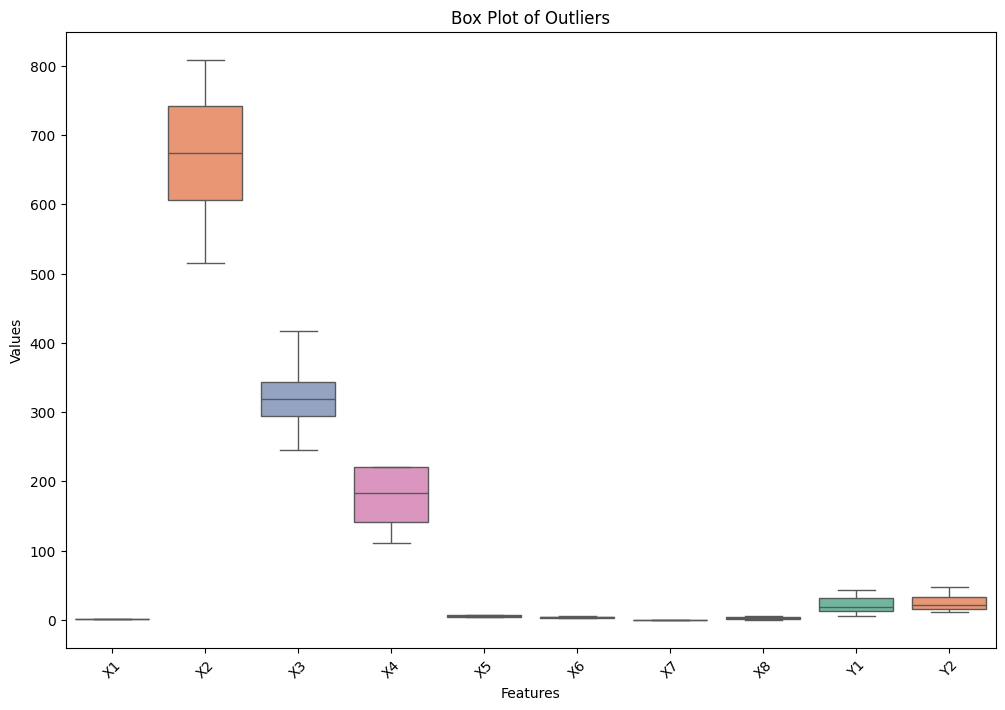

In [19]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, orient='v', palette='Set2')
plt.title('Box Plot of Outliers')
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

Linear Regression

In [24]:
X = df.iloc[:,:-2]
Y1 = df['Y1']
Y2 = df['Y2']

X_train, X_test, Y1_train, Y1_test = train_test_split(X, Y1, test_size=0.2, random_state=42)
X_train, X_test, Y2_train, Y2_test = train_test_split(X, Y2, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr_model_Y1 = LinearRegression()
lr_model_Y2 = LinearRegression()

lr_model_Y1.fit(X_train_scaled, Y1_train)
lr_model_Y2.fit(X_train_scaled, Y2_train)

Y1_pred = lr_model_Y1.predict(X_test_scaled)
Y2_pred = lr_model_Y2.predict(X_test_scaled)

rmse_Y1_lr = mean_squared_error(Y1_test, Y1_pred)
rmse_Y2_lr = mean_squared_error(Y2_test, Y2_pred)

r2_Y1_lr = r2_score(Y1_test, Y1_pred)
r2_Y2_lr = r2_score(Y2_test, Y2_pred)

print(f"Linear Regression - Hearing Load (Y1): RMSE = {rmse_Y1_lr}, R^2 = {r2_Y1_lr:.4f}")
print(f"Linear Regression - Hearing Load (Y2): RMSE = {rmse_Y2_lr}, R^2 = {r2_Y2_lr:.4f}")


Linear Regression - Hearing Load (Y1): RMSE = 9.153187855202756, R^2 = 0.9122
Linear Regression - Hearing Load (Y2): RMSE = 9.89342764794407, R^2 = 0.8932


Using Random Forest

In [25]:
X = df.iloc[:,:-2]
Y1 = df['Y1']
Y2 = df['Y2']

X_train, X_test, Y1_train, Y1_test = train_test_split(X, Y1, test_size=0.2, random_state=42)
X_train, X_test, Y2_train, Y2_test = train_test_split(X, Y2, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf_model_Y1 = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_Y2 = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model_Y1.fit(X_train_scaled, Y1_train)
rf_model_Y2.fit(X_train_scaled, Y2_train)

Y1_pred = rf_model_Y1.predict(X_test_scaled)
Y2_pred = rf_model_Y2.predict(X_test_scaled)

rmse_Y1_rf = mean_squared_error(Y1_test, Y1_pred)
rmse_Y2_rf = mean_squared_error(Y2_test, Y2_pred)

r2_Y1_rf = r2_score(Y1_test, Y1_pred)
r2_Y2_rf = r2_score(Y2_test, Y2_pred)

print(f"Random Forest - Hearing Load (Y1): RMSE = {rmse_Y1_rf:.2f}, R^2 = {r2_Y1_rf:.4f}")
print(f"Random Forest - Hearing Load (Y2): RMSE = {rmse_Y2_rf:.2f}, R^2 = {r2_Y2_rf:.4f}")

Random Forest - Hearing Load (Y1): RMSE = 0.25, R^2 = 0.9976
Random Forest - Hearing Load (Y2): RMSE = 2.98, R^2 = 0.9679


Hyperparameter Tuning

In [26]:
from sklearn.model_selection import RandomizedSearchCV


In [27]:
param_grid = {
    "n_estimators": [50, 100, 200, 300],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}
rf_random = RandomizedSearchCV(RandomForestRegressor(), param_grid, n_iter=10, cv=3, random_state=42)
rf_random.fit(X_train_scaled, Y1_train)
print("Best Parameters:", rf_random.best_params_)

Best Parameters: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': None}
